# Multiple Linear Regression
An example in how multiple independent variables can better predict a label.

The provided data from the advertising dataset describes the number of units of a product sold (in thousands) given the various TV, radio, and newspaper advertising budgets (in thousands).

## 1. Library Imports and Data Loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("data/advertising.csv")

## 2. Determine if we can use Multiple Linear Regression
* Data must be quantitative
* Data must have a linear relationship
* Residuals must be normally distributed
* There should be no meaningful correlation between independent variables

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


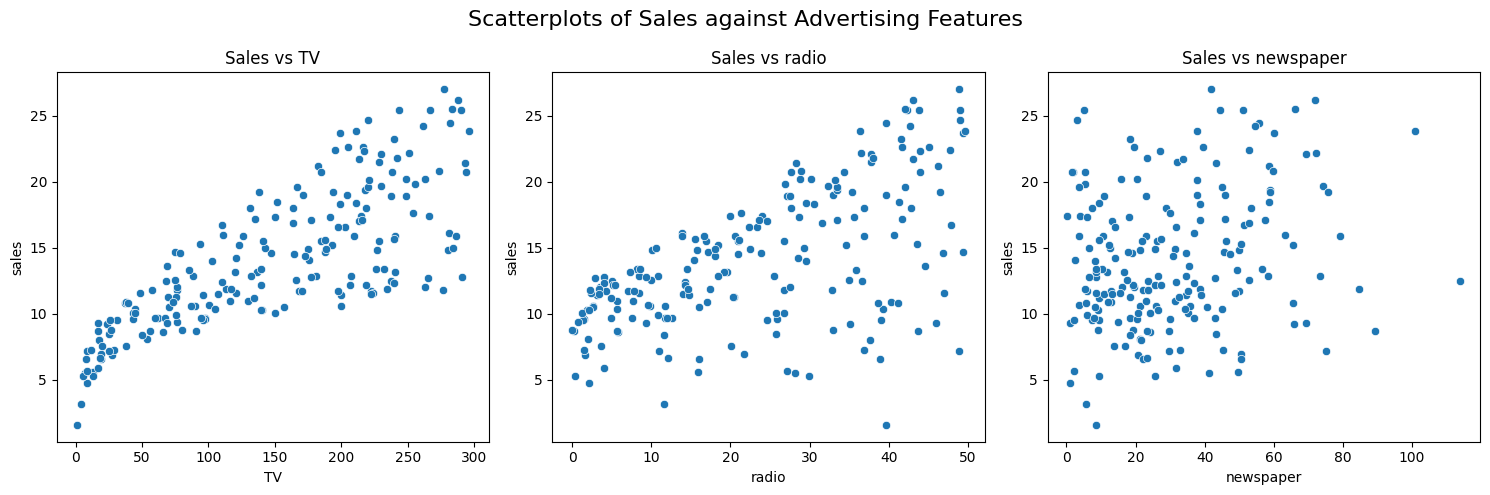

In [4]:
# Make sure the relationship looks linear
possible_features = ["TV", "radio", "newspaper"]

# Create 3 axes in 1 row that don't share the y axis
fig, axes = plt.subplots(nrows=1, ncols=len(possible_features), figsize=(15, 5), sharey=False)

# Loop through 
for index, feature in enumerate(possible_features):
    sns.scatterplot(data=df, x=feature, y="sales", ax=axes[index])
    axes[index].set_title(f'Sales vs {feature}')

fig.suptitle("Scatterplots of Sales against Advertising Features", fontsize=16)
fig.tight_layout()

## 3. Feature Selection

### 3.1. Correlation

<Axes: >

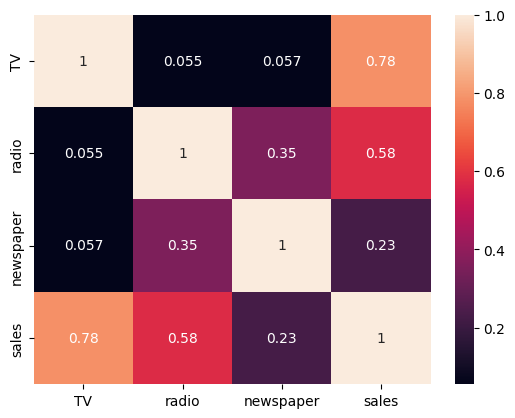

In [7]:
cor = df.corr()
sns.heatmap(cor, annot=True)

Based on this matrix, we could use TV and radio to predict sales. newspaper looks to highly correlated to radio.

### 3.2. Backward Elimination

In [8]:
# Create the model with everything first
selected_features = ["TV", "radio", "newspaper"]
y_train = df["sales"]

# Initialize the model
model = LinearRegression()

# Perform backward selection
while len(selected_features) > 1:
    # Train and calculate initial score
    X_train = df[selected_features]
    model.fit(X_train, y_train)
    initial_score = model.score(X_train, y_train)

    print("Features:", selected_features, "Score:", initial_score)

    worst_feature = None
    worst_score_diff = 1
    
    for feature in selected_features:
        # Create a new model without the current feature
        X_temp = X_train.drop(feature, axis=1)
        
        # Fit the model on the training data
        model.fit(X_temp, y_train)
        
        # Evaluate the model
        score = model.score(X_temp, y_train) 

        # Find the difference in the scores
        score_diff = initial_score - score

        print("Feature:", feature, "Score Diff:", score_diff, "Score:", score)
        
        # Update the worst feature if the current feature worsens the score
        if score_diff < worst_score_diff:
            worst_score_diff = score_diff
            worst_feature = feature
    
    # Remove the worst feature from the list of selected features
    selected_features.remove(worst_feature)
    print("Removed Feature:", worst_feature)

# Print final feature score
X_train = df[selected_features]
model.fit(X_train, y_train)
initial_score = model.score(X_train, y_train)

print("Features:", selected_features, "Score:", initial_score)

Features: ['TV', 'radio', 'newspaper'] Score: 0.8972106381789522
Feature: TV Score Diff: 0.5645054542286296 Score: 0.33270518395032256
Feature: radio Score Diff: 0.25137514434962505 Score: 0.6458354938293271
Feature: newspaper Score Diff: 1.6377096056507945e-05 Score: 0.8971942610828957
Removed Feature: newspaper
Features: ['TV', 'radio'] Score: 0.8971942610828957
Feature: TV Score Diff: 0.5651618056376003 Score: 0.33203245544529536
Feature: radio Score Diff: 0.2853192102328247 Score: 0.611875050850071
Removed Feature: radio
Features: ['TV'] Score: 0.611875050850071


While the best R^2 score occurs with all 3 independent variables, the difference when we add newspaper is so negligible, it tells us that adding this in would make our model overfit our data.

The best model includes only TV and radio.

### 3.3. Forward Selection

In [43]:
# TODO: Complete forward selection
# Write a loop to:
    # Add 1 feature at a time as an independent variable to the model
    # Print the R-squared for each 
    # Select the feature that provides the model with the highest R-squared
    # Repeat until there are no features left
# You will use the results printed to determine which features should
# be added to the actual model

selected_features = []
excluded_features = ["sales"]
y_train = df["sales"]

while len(selected_features) < (len(df.columns) -  len(excluded_features)):
    # Find missing features to test
    best_score = 0
    best_feature = ""
    missing_features = [i for i in df.columns if i not in selected_features and i not in excluded_features]

    # Test each features R^2
    for feature in missing_features:
        temp_selected_features = selected_features.copy()
        temp_selected_features.append(feature)
        X_train_temp = df[temp_selected_features]
        model.fit(X_train_temp, y_train)
        feature_score = model.score(X_train_temp, y_train)

        # Remember feature if it is the highest scoring
        if feature_score > best_score:
            best_score = feature_score
            best_feature = feature
        
        # Log Result
        print("Selected Features: ", temp_selected_features, " | Score: ", feature_score)
    
    # Log best result
    selected_features.append(best_feature)
    print("Selected Features (Best - Iteration " + str(len(temp_selected_features)) + "):", selected_features, "| Score: ", best_score)

Selected Features:  ['TV']  | Score:  0.611875050850071
Selected Features:  ['radio']  | Score:  0.33203245544529536
Selected Features:  ['newspaper']  | Score:  0.05212044544430516
Selected Features (Best - Iteration 1): ['TV'] | Score:  0.611875050850071
Selected Features:  ['TV', 'radio']  | Score:  0.8971942610828957
Selected Features:  ['TV', 'newspaper']  | Score:  0.6458354938293271
Selected Features (Best - Iteration 2): ['TV', 'radio'] | Score:  0.8971942610828957
Selected Features:  ['TV', 'radio', 'newspaper']  | Score:  0.8972106381789522
Selected Features (Best - Iteration 3): ['TV', 'radio', 'newspaper'] | Score:  0.8972106381789522


## 4. Create Final Model based off of feature selection

In [9]:
# Extract Data
X_train = df[["TV", "radio"]]
y_train = df["sales"]

# Create the model
model = LinearRegression()

# Train the model
model = model.fit(X_train, y_train)

print(model.coef_, model.intercept_)

[0.04575482 0.18799423] 2.921099912405131


In [10]:
# Make predictions
y_pred = model.predict(X_train)

## 5. Check Residuals

In [11]:
residuals = y_train - y_pred

<Axes: xlabel='sales', ylabel='Count'>

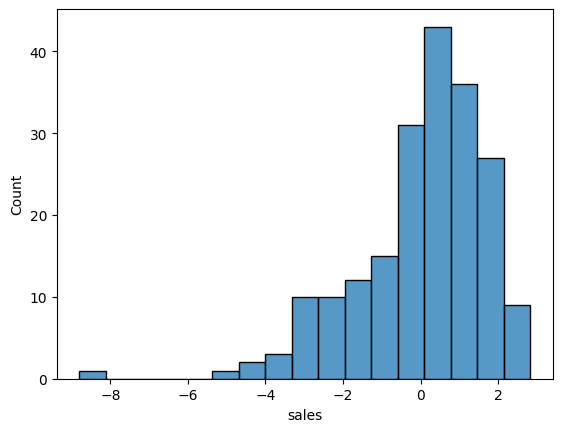

In [12]:
# Plot residuals
sns.histplot(residuals)

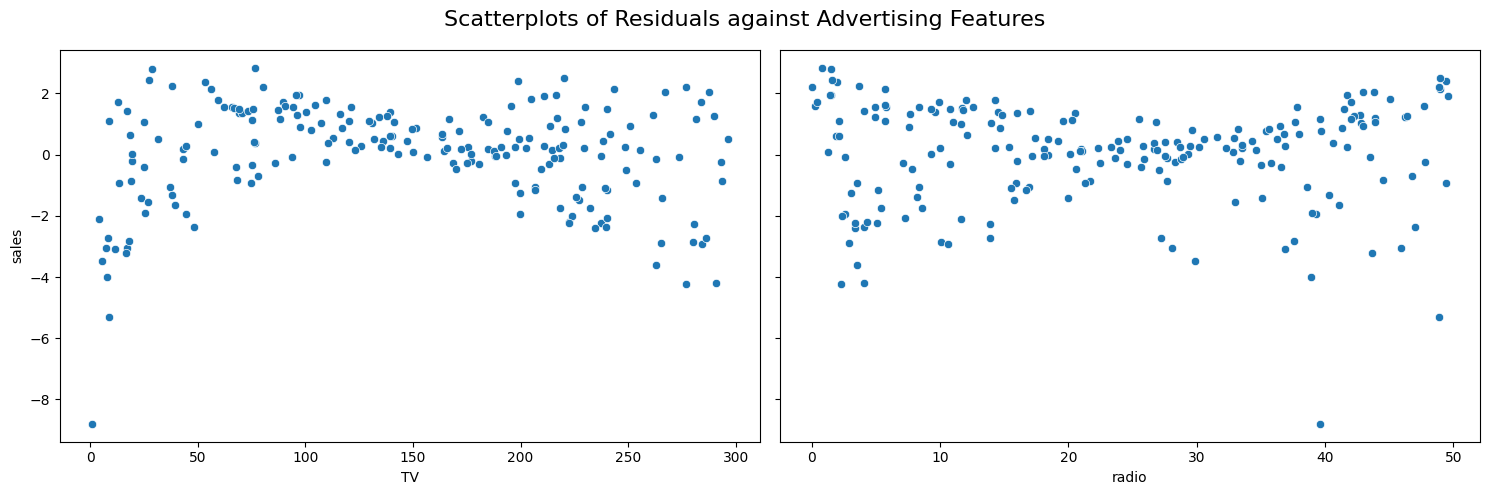

In [13]:
# Check homoscedasticity

# Create 2 axes in 1 row that don't share the y axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)

# Plot both residuals
sns.scatterplot(data=df, x="TV", y=residuals, ax=axes[0])
sns.scatterplot(data=df, x="radio", y=residuals, ax=axes[1])

# Add title
fig.suptitle("Scatterplots of Residuals against Advertising Features", fontsize=16)
fig.tight_layout()

## 6. Evaluate R^2

In [14]:
model.score(X_train, y_train)

0.8971942610828957